<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/Mini_Batch_and_Data_Load_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 미니 배치와 배치 크기 ( Mini Batch and Batch Size )

In [2]:
import torch

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 수많은 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념! 
# 이 단위를 미니 배치 (Mini Batch) 

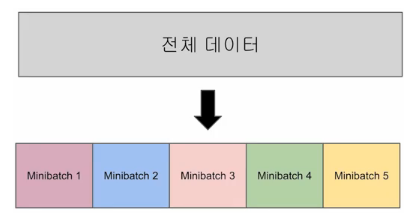

이렇게 MiniBatch를 다 돌게되면 1epoch를 도는것이다. <br>
미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데 미니 배치의 크기를 **배치 크기(batch size)** 라고 한다. 

* 전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방밥을 '배치 경사 하강법'이라고 부르며, 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 한다.

* 물론 배치 경사하강법을 하면 좋은데, 시간이 너무 오래걸린다. <br> 그래서 미니 배치 경사하강법을 사용하지만, Local Minumum을 찾는데 조금 헤매지만 훨씬 시간이 빠르다 .

* BatchSize는 보통 2의 제곱수를 사용한다. <br>
CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다고 한다.

## 2. 이터레이션 (iteraion)
---
  

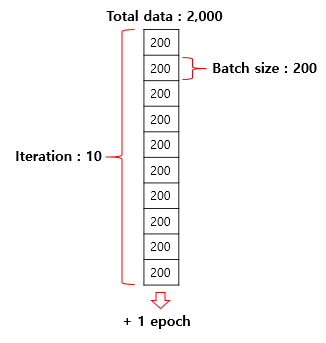

그림을 보면 단번에 이해가 간다. iteration은 1 epoch 안에서 몇번의 Batch_size를 순회하는지를 생각해보면 된다. <br>
**즉 1번의 Epoch 내에서 매개변수의 업데이트 횟수**

## 3. 데이터 로드하기 ( Data Load)
---
  데이터를 좀 더 쉽게 다를 수 있도록 유용한 도구로, Dataset 과 DataLoader를 제공한다. <br>
  DataSet을 정의하고 --> 이를 DataLoader에 전달 .

In [69]:
# 연습

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from torch.utils.data import TensorDataset # 텐서데이터셋 (예제)
from torch.utils.data import DataLoader # 데이터 로더
from torch.utils.data import Dataset


In [70]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [71]:
dataset = TensorDataset(x_train, y_train)

이렇게 데이터셋을 만들고, DataLoader에게 넘겨보자. <br>
DataLoader는 기본적으로 2개의 인자를 입력받는다. 하나는 데이터셋, 미니배치의 크기를 입력받는다. <br>
이때 미니 배치의 크기는 통상적으로 **2의 배수**를 사용한다. <br> 그리고 추가적으로 Epoch 마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾸는 shuffle 옵션을 자주 사용한다. 

모델이 문제에 익숙해지지 않기 위해선, shuffle = True를 주는 것을 권장한다.

In [72]:
# dataloader

dataloader = DataLoader(dataset, batch_size= 2, shuffle = True)

In [73]:
model = nn.Linear(3,1)
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

In [74]:
epochs = 500

for epoch in range(epochs + 1 ):
  for batch_idx, samples in enumerate(dataloader): # batch 별 / sample 을 데이터 로더가 뽑아내준다.
    # print(f'{batch_idx} 번째  batch , 그때의 Dataset{samples}' )
  
    x_train, y_train = samples
    prediction = model(x_train)

  # cost 
    cost = F.mse_loss(prediction, y_train)

  # parameter tunning
    optimizer.zero_grad() # 초기화
    cost.backward() # gradient descent
    optimizer.step() # 새로 할당

  if epoch % 50 == 0: # overfitting 이 일어남을 확인할 수 있지롱
    print(f'{epoch} / {epochs}, Cost : {cost:.4f}')

  

0 / 500, Cost : 2646.4036
50 / 500, Cost : 0.7690
100 / 500, Cost : 6.3051
150 / 500, Cost : 6.5232
200 / 500, Cost : 4.3385
250 / 500, Cost : 0.6311
300 / 500, Cost : 2.9748
350 / 500, Cost : 1.9972
400 / 500, Cost : 0.9923
450 / 500, Cost : 1.4424
500 / 500, Cost : 3.0353


In [75]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.5135]], grad_fn=<AddmmBackward0>)


## 4. 커스텀 데이터셋(Custom Dataset)
---
  기본적인 사용방법은 우리의 데이터를 DataSet 과 DataLoader에 맞게끔 만들어주면 된다. <br>
  torch.utils.data.Dataset을 상속받아서 만들어보자.  <br>
  가장 기본적인 뼈대는 3가지 define을 정의해야한다. 

In [112]:
class CustomDataset(Dataset):
  # class 초기화 즉 데이터셋 전처리
  def __init__(self): 
    self.x_data = [[73, 80, 75],
                    [93, 88, 93],
                    [89, 91, 90],
                    [96, 98, 100],
                    [73, 66, 70]]

    self.y_data = [[152], [185], [180], [196], [142]]
  # dataset 길이, 총 Sample의 수 
  def __len__(self): 
    return len(self.x_data)

 # Dataset에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x,y 

* len(dataset)을 했을 때 데이터셋의 크기를 리턴할 **len**
* dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 **get_item**

In [113]:
dataset = CustomDataset()

dataloader = DataLoader(dataset, batch_size = 2, shuffle= True)


In [114]:
model = nn.Linear(3,1)
optimizer = optim.SGD(model.parameters(), lr= 1e-5)

In [116]:
epochs = 20
for epoch in range(epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    
    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # cost를 minimum 으로 gradient descent
    optimizer.step() # optimizer Tunning!


    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))





Epoch    0/20 Batch 1/3 Cost: 7.563790
Epoch    0/20 Batch 2/3 Cost: 6.979338
Epoch    0/20 Batch 3/3 Cost: 25.129562
Epoch    1/20 Batch 1/3 Cost: 7.678989
Epoch    1/20 Batch 2/3 Cost: 7.321282
Epoch    1/20 Batch 3/3 Cost: 24.267830
Epoch    2/20 Batch 1/3 Cost: 13.193783
Epoch    2/20 Batch 2/3 Cost: 4.659960
Epoch    2/20 Batch 3/3 Cost: 10.804486
Epoch    3/20 Batch 1/3 Cost: 19.465157
Epoch    3/20 Batch 2/3 Cost: 11.910372
Epoch    3/20 Batch 3/3 Cost: 0.751908
Epoch    4/20 Batch 1/3 Cost: 20.993603
Epoch    4/20 Batch 2/3 Cost: 11.094796
Epoch    4/20 Batch 3/3 Cost: 0.641715
Epoch    5/20 Batch 1/3 Cost: 21.229725
Epoch    5/20 Batch 2/3 Cost: 7.971321
Epoch    5/20 Batch 3/3 Cost: 4.737278
Epoch    6/20 Batch 1/3 Cost: 16.037376
Epoch    6/20 Batch 2/3 Cost: 7.670267
Epoch    6/20 Batch 3/3 Cost: 1.573238
Epoch    7/20 Batch 1/3 Cost: 8.083278
Epoch    7/20 Batch 2/3 Cost: 2.424754
Epoch    7/20 Batch 3/3 Cost: 28.807684
Epoch    8/20 Batch 1/3 Cost: 8.802688
Epoch    8/20 

In [117]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[154.2132]], grad_fn=<AddmmBackward0>)
